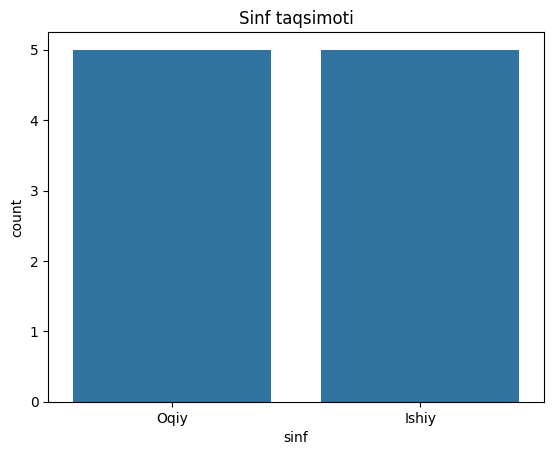

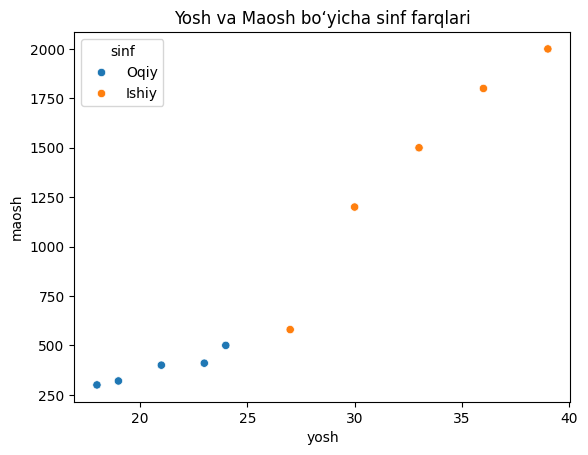

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
 [[1 0]
 [0 1]]


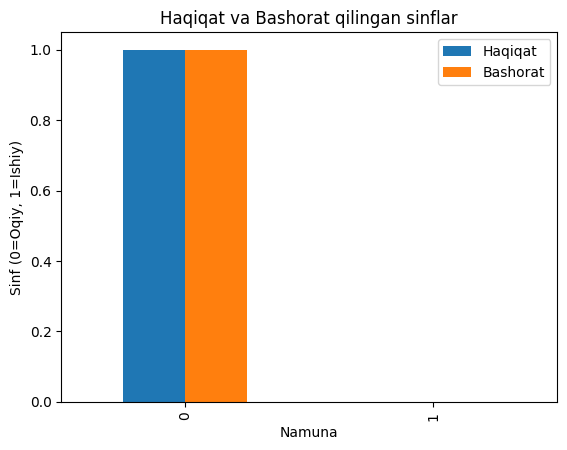

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Ma'lumotlar
data = {
    "yosh": [18, 19, 21, 23, 24, 27, 30, 33, 36, 39],
    "maosh": [300, 320, 400, 410, 500, 580, 1200, 1500, 1800, 2000],
    "sinf": ["Oqiy", "Oqiy", "Oqiy", "Oqiy", "Oqiy", "Ishiy", "Ishiy", "Ishiy", "Ishiy", "Ishiy"]
}
df = pd.DataFrame(data)

# Vizualizatsiya: sinf taqsimoti
sns.countplot(x="sinf", data=df)
plt.title("Sinf taqsimoti")
plt.show()

# Vizualizatsiya: yosh va maosh
sns.scatterplot(x="yosh", y="maosh", hue="sinf", data=df)
plt.title("Yosh va Maosh bo‘yicha sinf farqlari")
plt.show()

# Klasslarni raqamlarga o‘tkazish: Oqiy → 0, Ishiy → 1
df["sinf"] = df["sinf"].map({"Oqiy": 0, "Ishiy": 1})

# X va y ni ajratamiz
X = df[["yosh", "maosh"]]
y = df["sinf"]

# Ma'lumotlarni bo‘lish (train/test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model yaratish va o‘qitish
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Bashorat qilish
y_pred = model.predict(X_test)

# Natijalar
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Natijalarni ko‘rsatish
result = pd.DataFrame({"Haqiqat": y_test, "Bashorat": y_pred})
result = result.reset_index(drop=True)
bar = result.plot(kind="bar")
plt.title("Haqiqat va Bashorat qilingan sinflar")
plt.xlabel("Namuna")
plt.ylabel("Sinf (0=Oqiy, 1=Ishiy)")
plt.show()
